Project - 6

# Loan Prediction

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

## Accessing the Dataset

In [30]:
ln= pd.read_csv("loan_prediction.csv")
ln.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Exploratory Data Analysis

In [31]:
ln.shape

(614, 13)

In [32]:
ln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [33]:
ln.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### Finding and filling the missing values

In [34]:
ln.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [35]:
ln['Gender'] = ln['Gender'].fillna(ln['Gender'].dropna().mode().values[0] )
ln['Married'] = ln['Married'].fillna(ln['Married'].dropna().mode().values[0] )
ln['Dependents'] = ln['Dependents'].fillna(ln['Dependents'].dropna().mode().values[0] )
ln['Self_Employed'] = ln['Self_Employed'].fillna(ln['Self_Employed'].dropna().mode().values[0] )
ln['Loan_Amount_Term'] = ln['Loan_Amount_Term'].fillna(ln['Loan_Amount_Term'].dropna().mode().values[0] )
ln['Credit_History'] = ln['Credit_History'].fillna(ln['Credit_History'].dropna().mode().values[0] )
ln['LoanAmount'] = ln['LoanAmount'].fillna(ln['LoanAmount'].dropna().mode().values[0] )

In [36]:
#ln_train.head(30)

#### Cleared all the missing values

In [37]:
ln.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### Data visualization

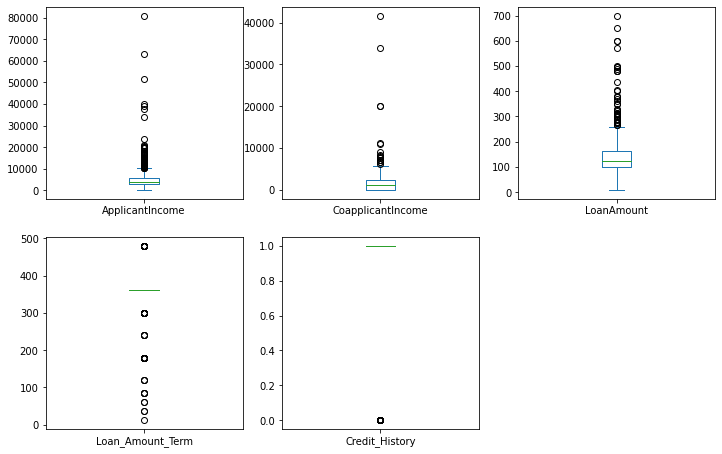

In [38]:
ln.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False,subplots=True);

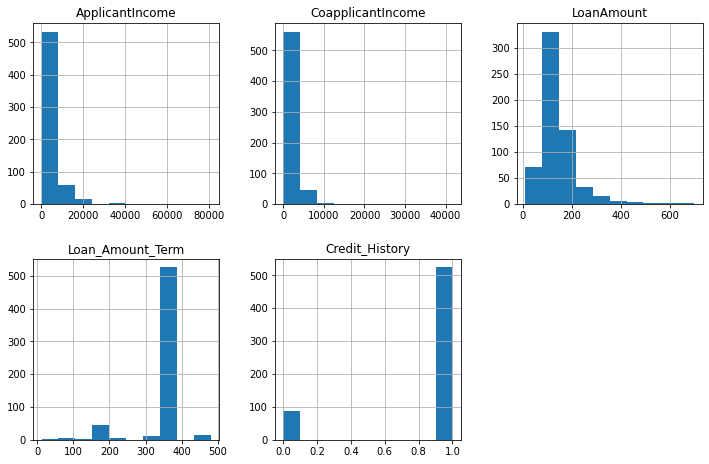

In [39]:
ln.hist(figsize=(12,12),layout=(3,3),sharex=False);

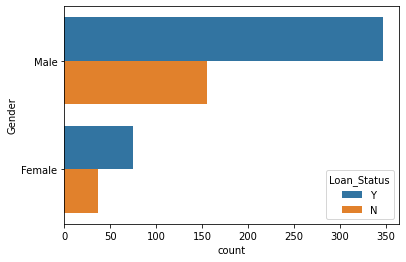

In [40]:
sns.countplot(y='Gender',hue='Loan_Status',data=ln);

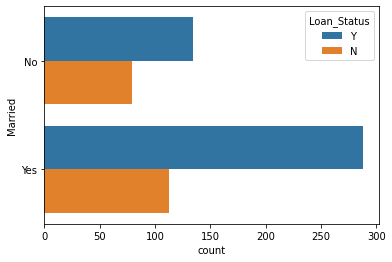

In [41]:
sns.countplot(y='Married',hue='Loan_Status',data=ln);

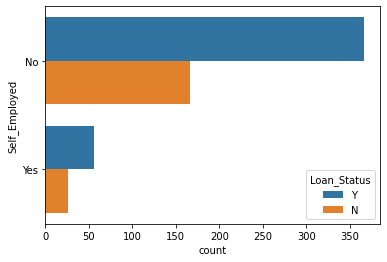

In [42]:
sns.countplot(y='Self_Employed',hue='Loan_Status',data=ln);

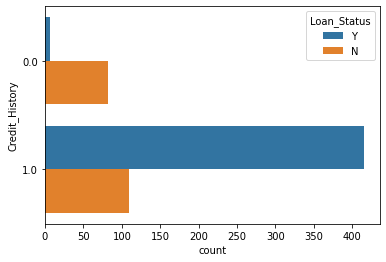

In [43]:
sns.countplot(y='Credit_History',hue='Loan_Status',data=ln);

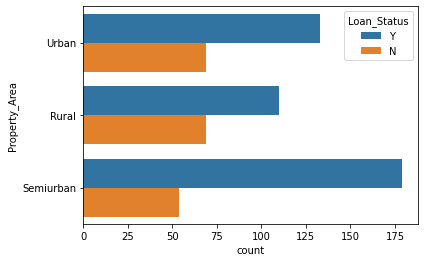

In [44]:
sns.countplot(y='Property_Area',hue='Loan_Status',data=ln);

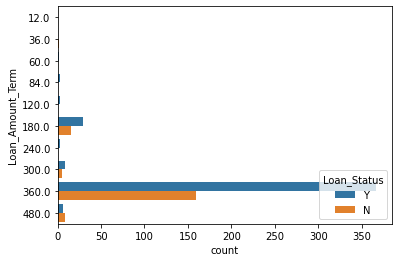

In [45]:
sns.countplot(y='Loan_Amount_Term',hue='Loan_Status',data=ln);

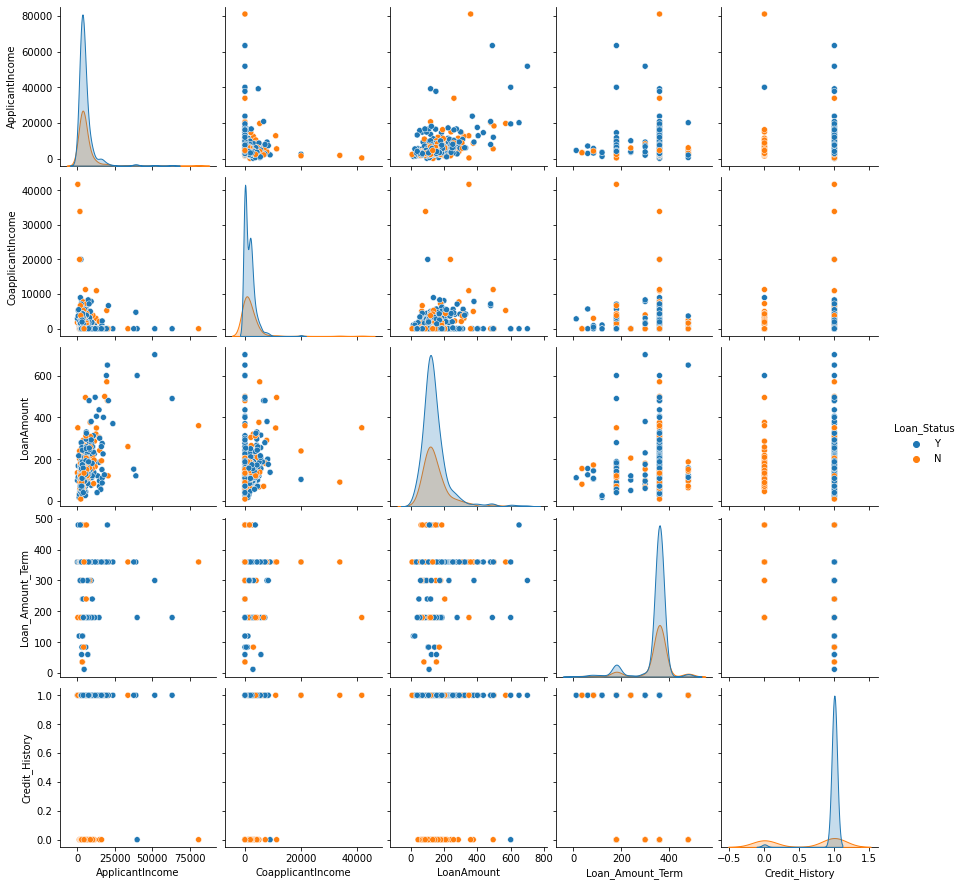

In [46]:
sns.pairplot(ln,hue='Loan_Status');

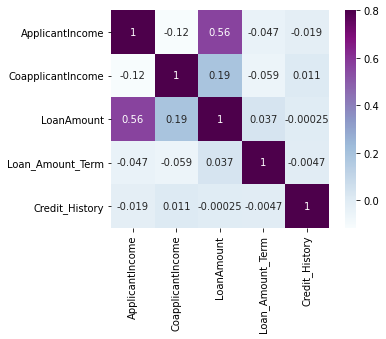

In [47]:
matrix = ln.corr()
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True);

## Model Building

In [48]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler,LabelEncoder

df = ln.copy()
df = df.apply(LabelEncoder().fit_transform)
df = df.drop('Loan_ID',axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,376,0,73,8,1,2,1
1,1,1,1,0,0,306,60,81,8,1,0,0
2,1,1,0,0,1,139,0,26,8,1,2,1
3,1,1,0,1,0,90,160,73,8,1,2,1
4,1,0,0,0,0,381,0,94,8,1,2,1


In [49]:
ss = StandardScaler().fit(df.drop('Loan_Status',axis=1))

In [50]:
X = ss.transform(df.drop('Loan_Status',axis=1))
y = ln.Loan_Status

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Decision Tree Classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
model=dtc.fit(X_train,y_train)
y_pred = model.predict(X_test)

acc = dtc.score(X_test,y_test)
print("Accuracy: {:,.2f} ".format(acc*100),"%")

Accuracy: 73.17  %


### Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
model1=lr.fit(X_train,y_train)
y_pred1 = model1.predict(X_test)

acc1 = lr.score(X_test,y_test)
print("Accuracy: {:,.2f} ".format(acc1*100),"%")

Accuracy: 82.93  %


### Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
model2 = rfc.fit(X_train,y_train) 
y_pred2 = model2.predict(X_test)

acc2 = rfc.score(X_test,y_test)
print("Accuracy: {:,.2f} ".format(acc2*100),"%")

Accuracy: 79.67  %


#### From the results obtained above,we can tell that Logistic regression model performed better than the others and Random Forest Classfier performed better than Decision Tree Classifier. 

#### An accuracy of 82.93% is obtained from the Logistic Regression model.